In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as colormaps
from scipy import interpolate

from importlib import reload

import environment as Env
import ray as Ray
import simulation as Sim

from topography import bathymetry as Bathy

In [2]:
# reload(Env)

# # floor = lambda x: -550 * np.ones_like(x)
# floor = lambda x: -500 * np.sin(0.001 * x) - 750
# # floor = lambda x: -5 * np.sin(0.01 * x) - 750
# # floor = lambda x: -0.27 * x - 500
# # floor = lambda x: np.maximum(-1 * np.exp(0.0005 * x) - 500, -1500 + 0.02*x)

# ceiling = lambda x: 0 * np.ones_like(x)

# env = Env.Environment2D(
#     floor=floor,
#     ceiling=ceiling
# )

In [3]:
reload(Bathy)

map_path = 'src/asc/MNT_MED100m_GDL-CA_HOMONIM_WGS84_NM_ZNEG.asc'
map = Bathy.Map.from_asc(map_path)

In [4]:
start = (2.8995, 41.6995)  # lower left
stop = (7.9005, 41.6995)  # lower right

x, z = map.cut(start, stop, npoints=100)
floor = interpolate.interp1d(x, z)

In [5]:
reload(Env)
ceiling = lambda x: 0 * np.ones_like(x)

env = Env.Environment2D(
    floor=floor,
    ceiling=ceiling
)

In [6]:
# Source setup
source = np.array([0., 0.])
angle = -0.5
angle=-1

In [7]:
# reload(Ray)

# freq = 100
# ray = Ray.Ray2D(env, source, freq, angle)
# ray.propagate()

# print(ray.stop_reason)

In [10]:
# fig = plt.figure(figsize=(15, 10))
# ray.plot(fig)
# env.plot(fig, c='r')
# plt.show()

# # TODO: this is obviously an approximation error leading to a -∞ slope

# print(ray.__dict__)

In [34]:
reload(Ray)
reload(Env)
reload(Sim)

# sim = Sim.Simulation2D (env, source)
# sim.cast (freq, -0.5, -0.6, -0.7, -0.8, -0.9, 1., dx_max=10, dz_max=10, n_rebounds_max=4, backprop=True)  # , verbose=True)
# sim.cast (freq, -0.5, -0.5001, -0.5002, -0.5003, -0.5004, dx_max=10, dz_max=10, backprop=False)  # , verbose=True)
# sim.cast (freq, -0.5, -0.500001, -0.500002, -0.500003, -0.50004, dx_max=10, dz_max=10, backprop=False)  # , verbose=True)
# sim.cast (freq, -0.5, -0.6, -0.7, -0.8, -0.9, 1., dx_max=50, dz_max=25, n_rebounds_max=20, backprop=True)  # , verbose=True)

# sim.cast (
#     freq,
#     *[i/100 for i in range(-1, -100, -1)],  #-10)],
#     dx_max=10,
#     dz_max=10,
#     backprop=True,
#     # n_rebounds_max=4
# )

# sim.cast (
#     freq,
#     *[i/100 for i in range(-1, -100, -1)],  #-10)],
#     dx_max=10,
#     dz_max=10,
#     backprop=True,
#     n_rebounds_max=4
# )

# sim.cast (
#     freq,
#     *[i/1000 for i in range(-1, -1000, -1)],
#     dx_max=50,
#     dz_max=25,
#     backprop=True,
#     n_rebounds_max=6  #4:25s 6:40s 8:?s 10:60s 20:1m45s
# )


# sim.cast (
#     freq,
#     *[i/1000 for i in range(-1, -1000, -1)],
#     dx_max=50,
#     dz_max=25,
#     backprop=False,
#     n_rebounds_max=6  #4:25s 6:40s 8:?s 10:60s 20:1m45s
# )

## heatmap tests
# sim.cast (
#     freq,
#     *[i/100 for i in range(-1, -100, -1)],
#     dx_max=50,
#     dz_max=25,
#     backprop=False,
#     n_rebounds_max=6  #4:25s 6:40s 8:?s 10:60s 20:1m45s
# )


target = np.array([3500, -1000])
sim = Sim.EigenraySim2D (env, source, target, dx_max=50, dz_max=25, backprop=False, n_rebounds_max=6)
display_pack = sim.pack_scan  #'__iter0-scan'

In [35]:
sim.refine(iterations=5)

	Refine #1 mean distance: 11.96207362864851
	Refine #2 mean distance: 5.5888175155360305
	Refine #3 mean distance: 3.917190746620473
	Refine #4 mean distance: 1.7081017172744497
	Refine #5 mean distance: 2.2797652054092317


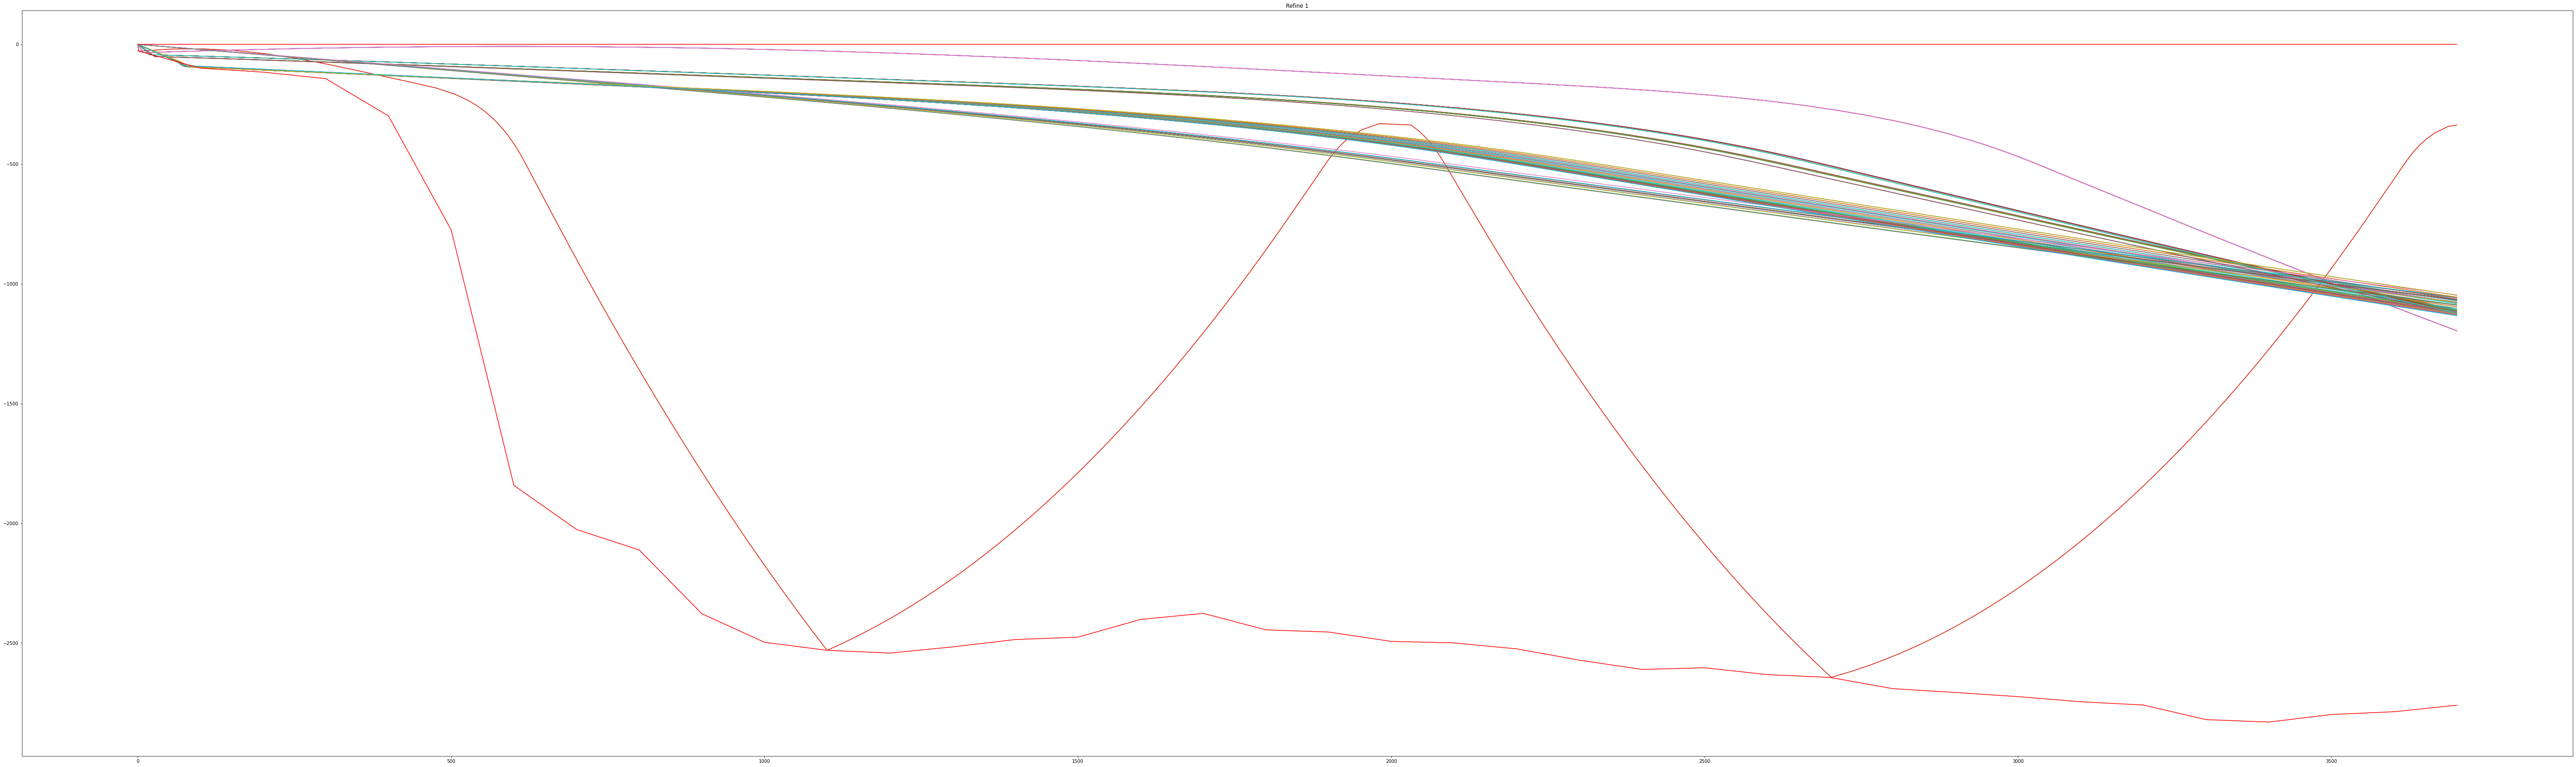

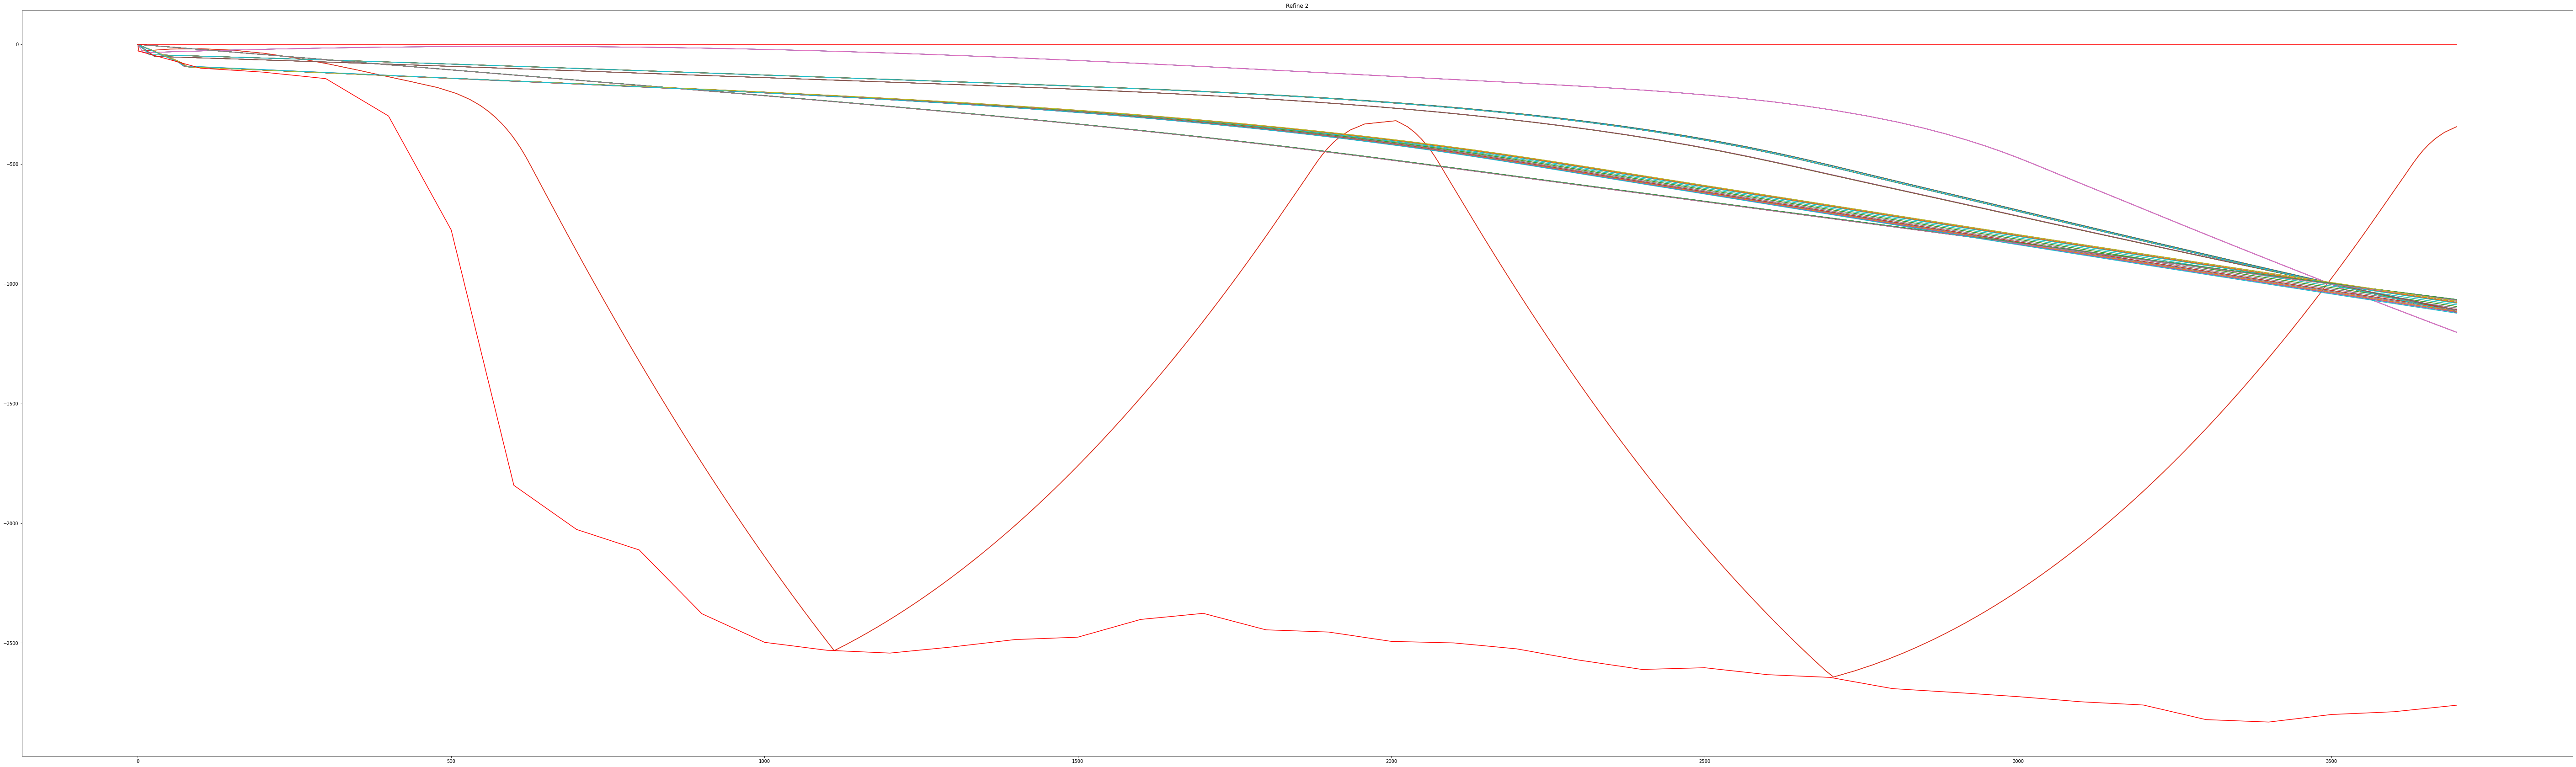

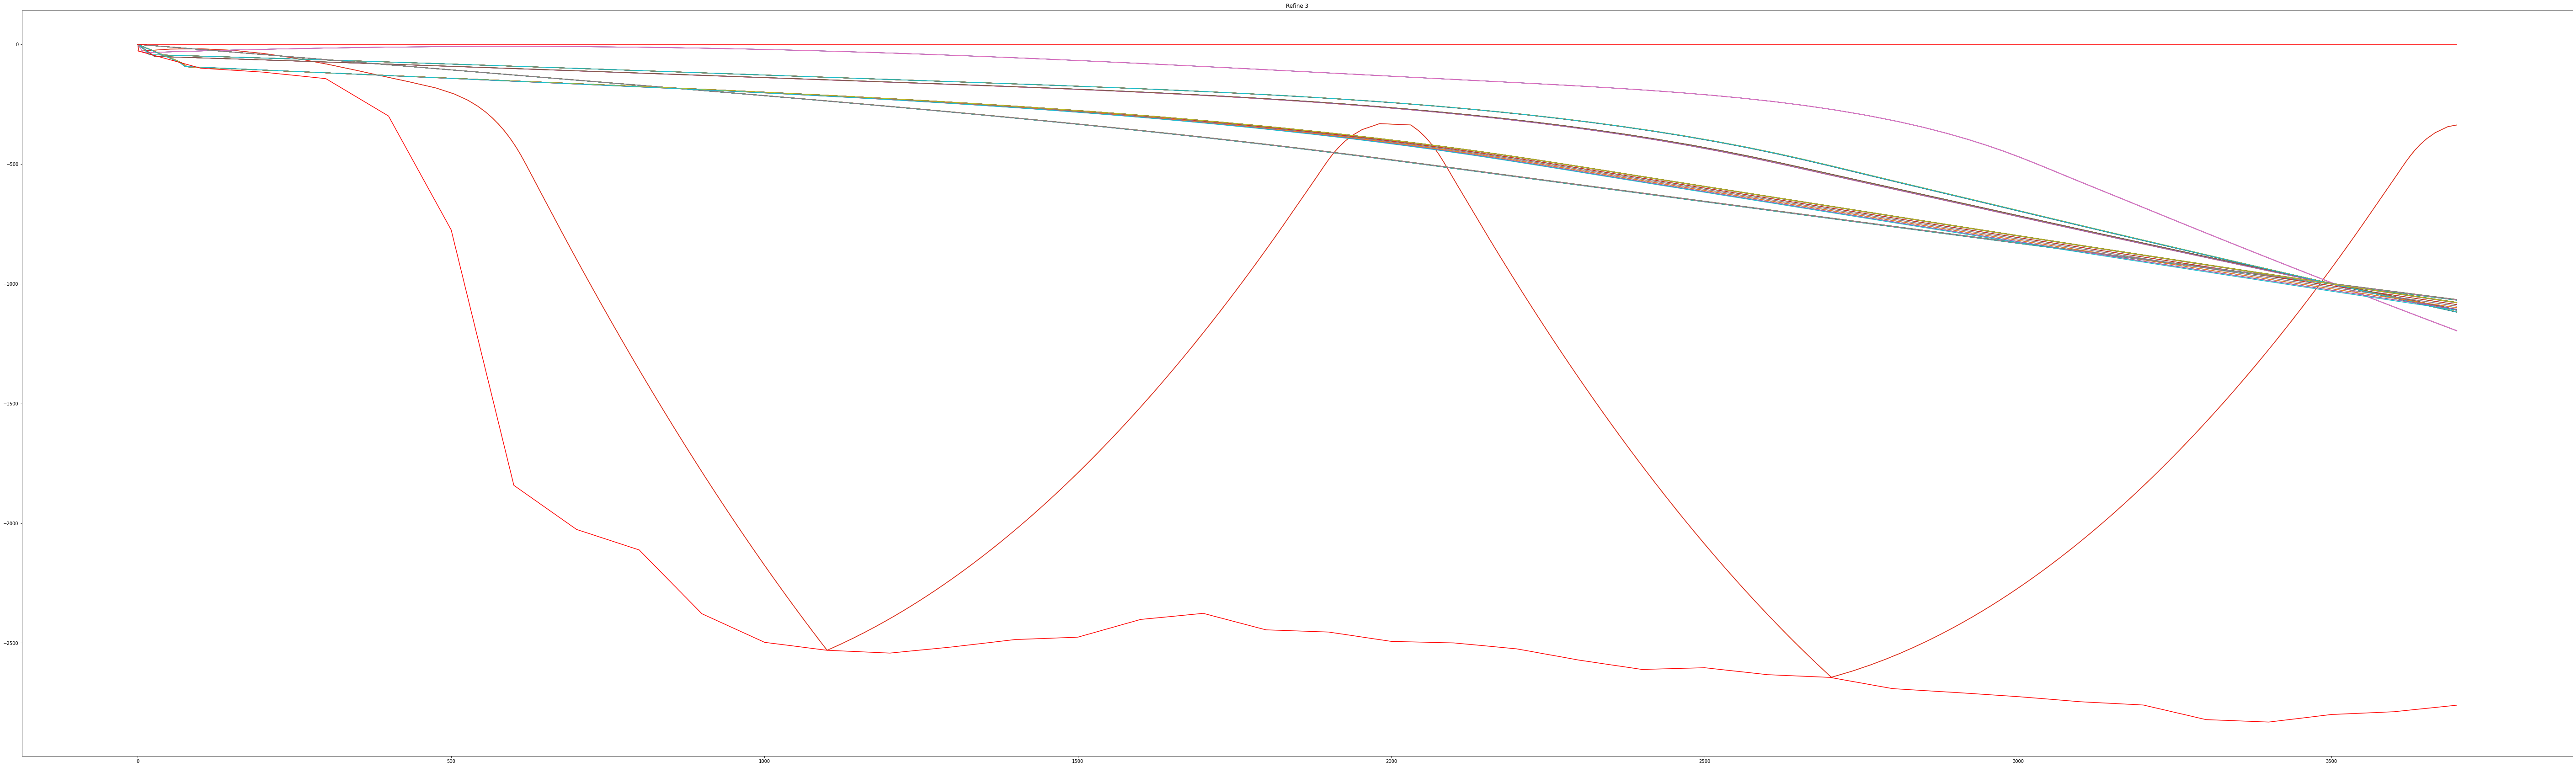

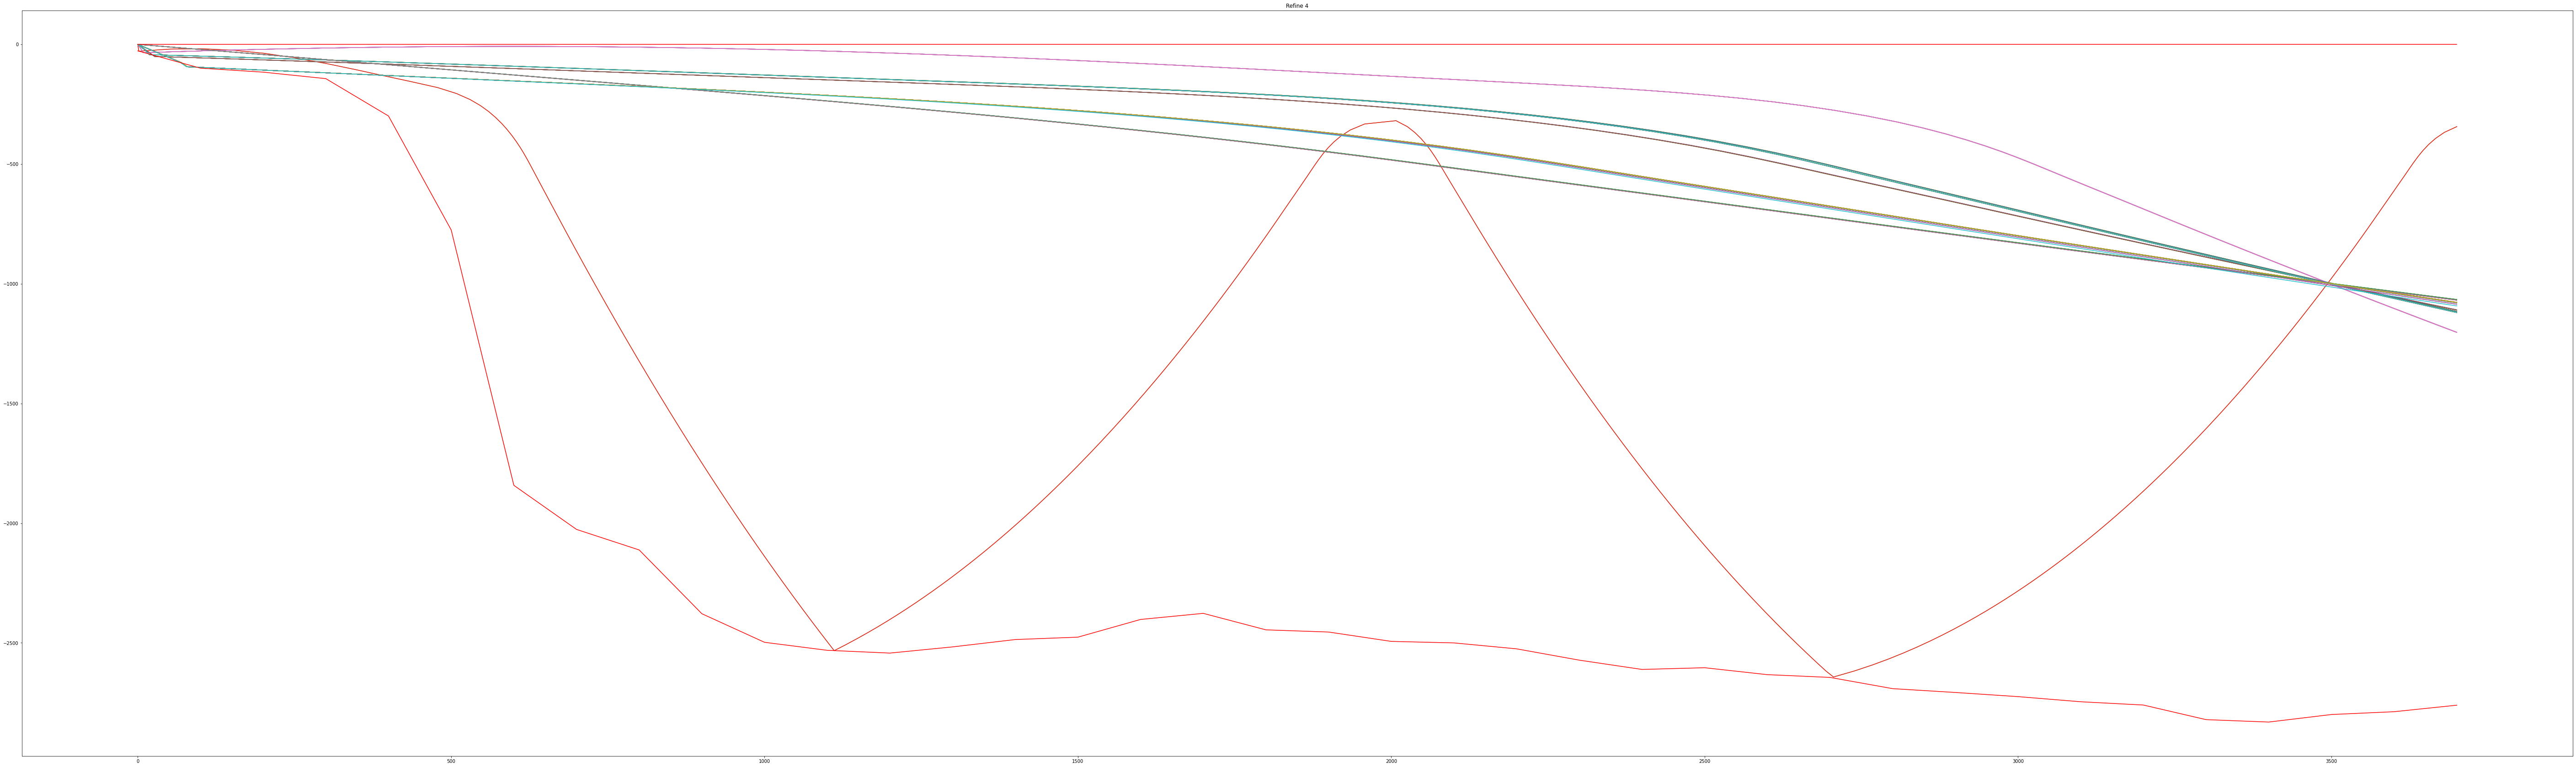

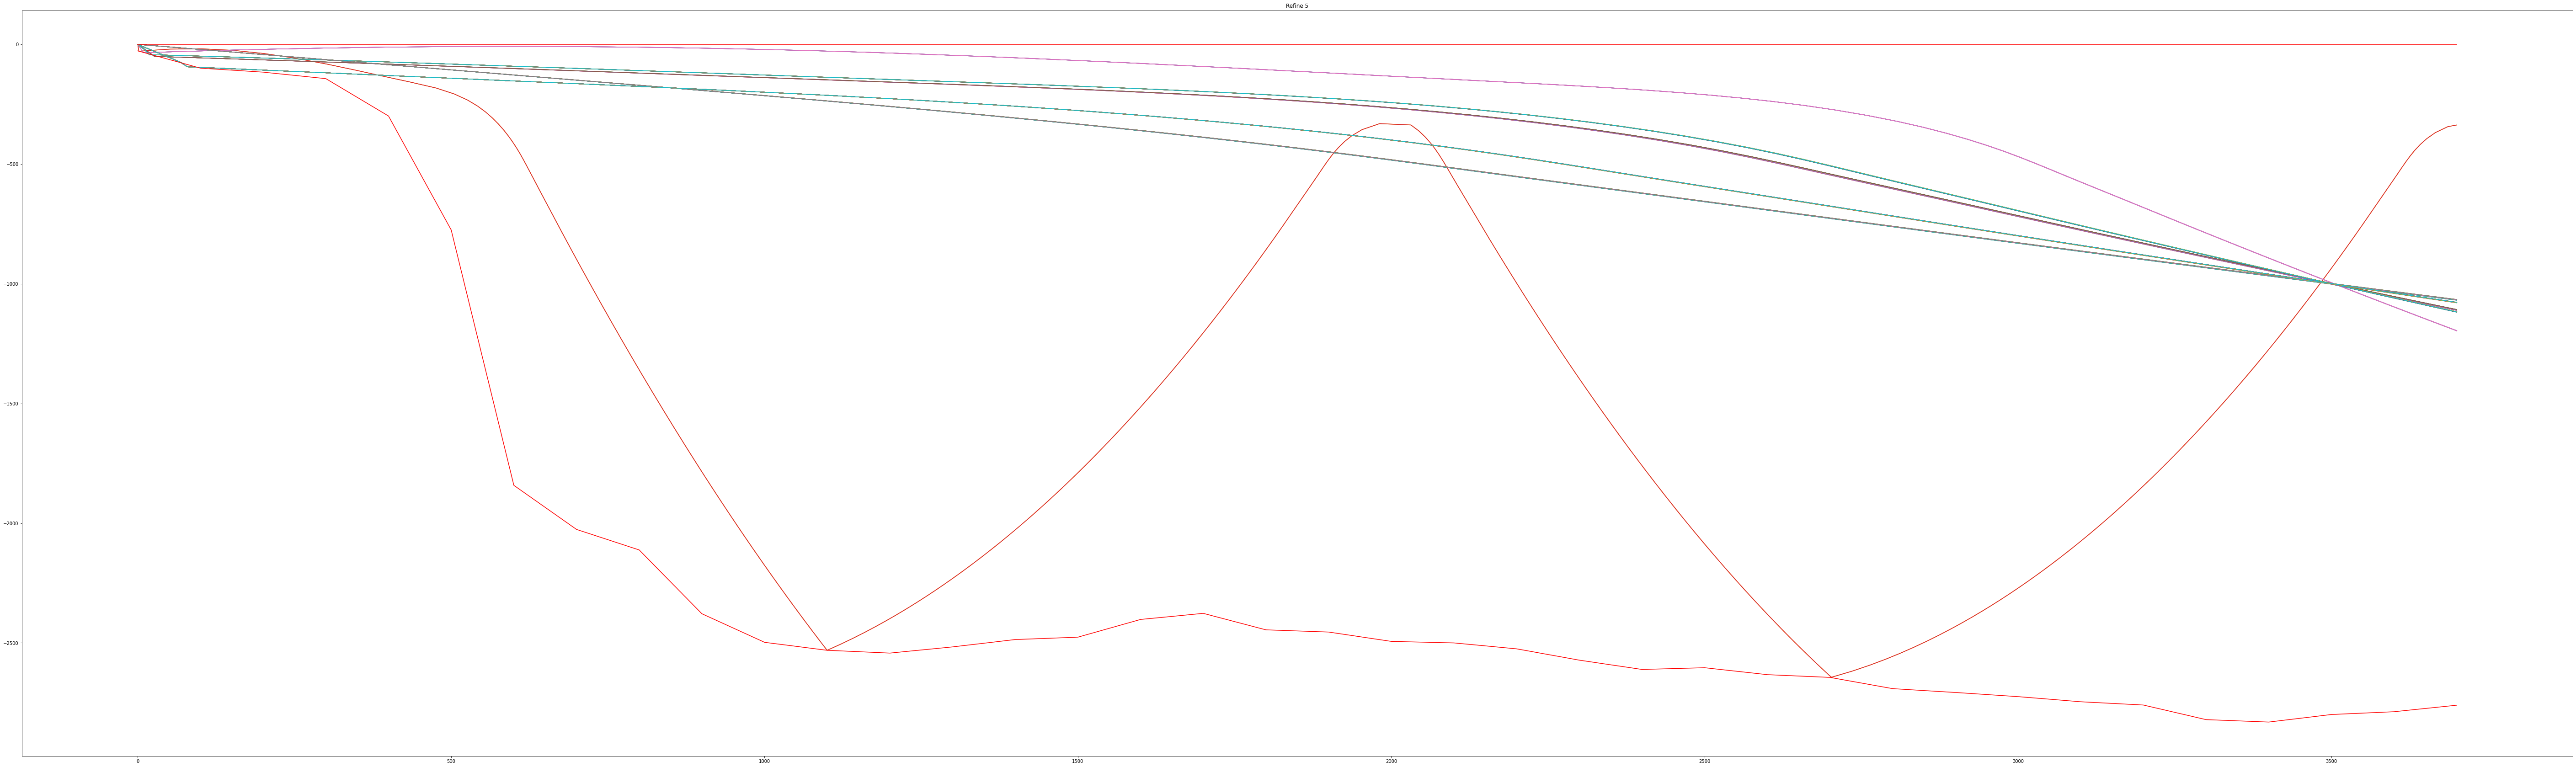

In [41]:
for rid in range(1, sim.n_refines+1):

    pack = sim.gen_pack_refine(rid)

    fig = plt.figure(figsize=(100, 30))
    sim.plot(fig, pack=pack)
    plt.title(f'Refine {rid}')
    plt.show(fig)

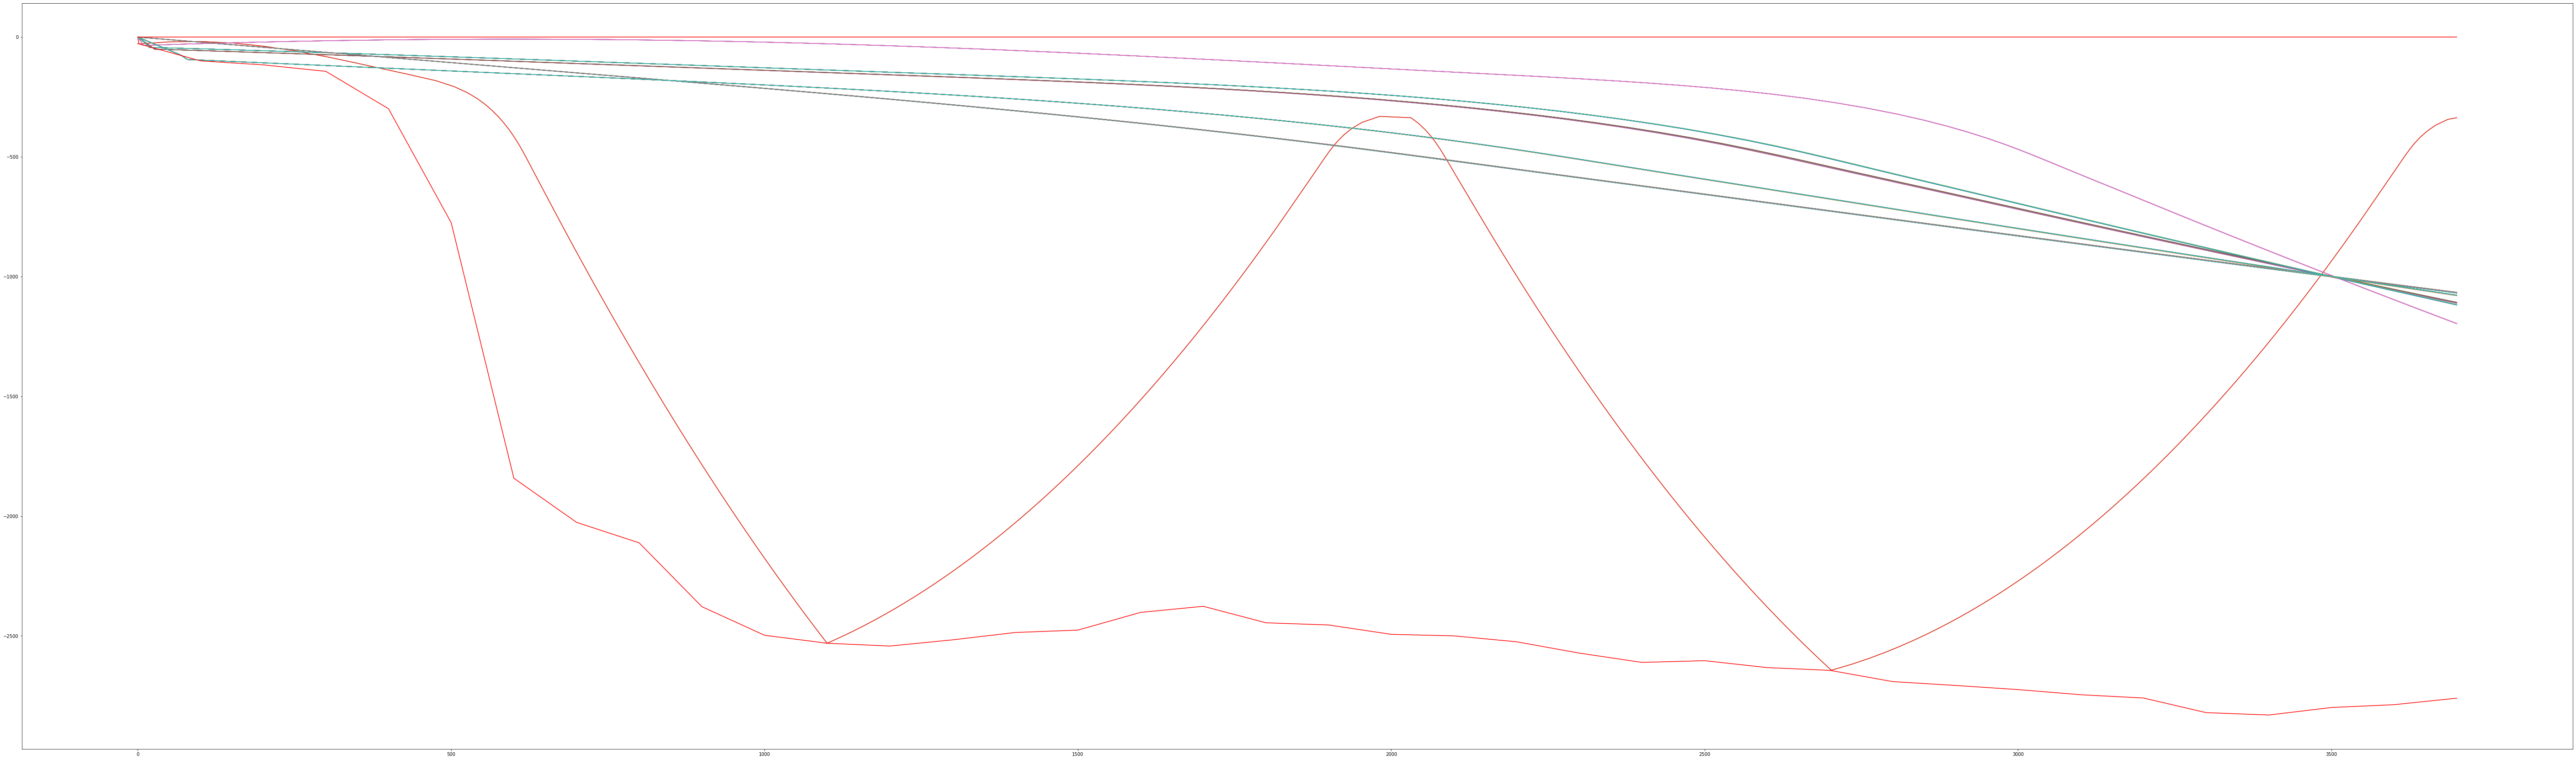

In [32]:
# #TODO: 3D plot through time and 2D animation through time
# fig = plt.figure(figsize=(100, 30))
# # sim.plot(fig)
# sim.plot(fig, pack=sim.glp())
# # plt.close(fig)
# # plt.xlim((sim.range_min[0], sim.range_max[0]))
# # plt.ylim((sim.range_min[1], sim.range_max[1]))
# # plt.scatter(target[0], target[1], c='red')
# plt.show(fig)

# # fig.savefig('out.jpg', format='jpg')

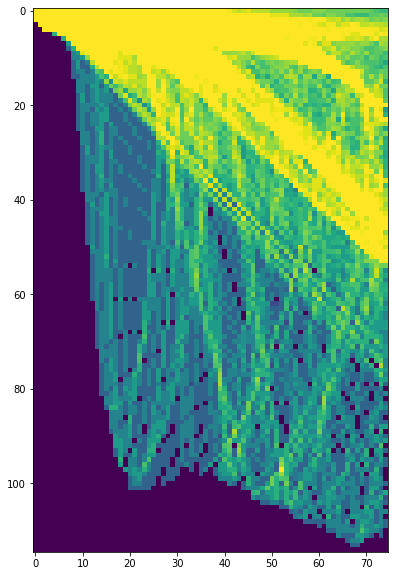

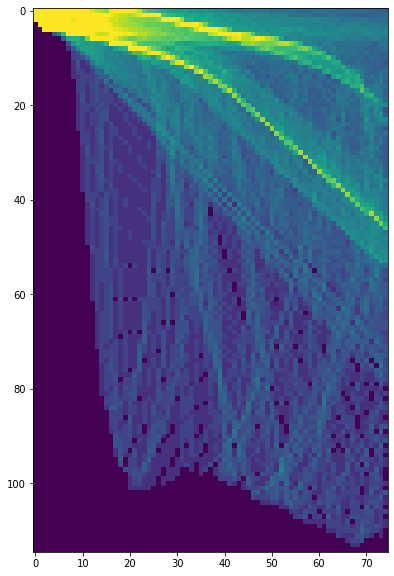

In [60]:
# res = np.array([50, 25])
res = np.array([50, 25])

# Very sensitive
heatmap_plot_HI = sim.heatmap(resolution=res, reduction_power=.5, cutoff=.02, pack=display_pack)
plt.figure(figsize=(30, 10))
plt.imshow(heatmap_plot_HI)

# Less sensitive
heatmap_plot_LO = sim.heatmap(resolution=res, reduction_power=.5, cutoff=.1, pack=display_pack)
plt.figure(figsize=(30, 10))
plt.imshow(heatmap_plot_LO)

In [15]:
import cv2

heatmap_plot = heatmap_plot_LO

heatmap_plot_norm = (heatmap_plot - np.min(heatmap_plot)) / np.max(heatmap_plot)
heatmap_norm_3ch = np.tile(heatmap_plot_norm * 255, (3, 1, 1))
heatmap_norm_3ch = np.transpose(heatmap_norm_3ch, (1, 2, 0))

# cv2.imwrite('heatmap.jpg', heatmap_norm_3ch)

True

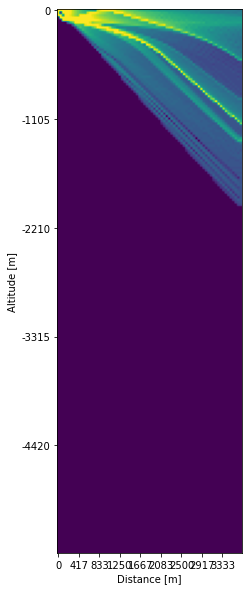

In [16]:
# TODO: add tickmarks
xdim, ydim = heatmap_plot.shape
plt.figure(figsize=(30, 10))

xticks_npoints = 10
yticks_npoints = 6
xticks_heatmap = np.linspace(0, ydim, xticks_npoints)
yticks_heatmap = np.linspace(0, xdim, yticks_npoints)
xticks_true = np.round(np.linspace(0, ydim, xticks_npoints) * res[0], 0) .astype(int)
yticks_true = np.round(np.linspace(0, xdim, yticks_npoints) * -1 * res[1], 0) .astype(int)
# TODO: Replace with clean arange

plt.xticks(xticks_heatmap, xticks_true)
plt.yticks(yticks_heatmap, yticks_true)
plt.xlabel('Distance [m]')
plt.ylabel('Altitude [m]')

plt.imshow(heatmap_plot)  # plt.imsave('heatmap.png', heatmap_plot.T)

In [17]:
# # Plot ground (convex assumption)
# z_floor = sim.env.floor(np.arange(0, ydim, 1) * res[0])  # floor samples
# z_width = np.arange(0, xdim, 1) * -1 * res[1]
# floor_mask = (np.tile(z_width, (ydim, 1)).T < z_floor).T

# floor_overlay = np.tile(floor_mask * 255, (3, 1, 1))
# floor_overlay = np.transpose(floor_overlay, (2, 1, 0))
# floor_overlay[:, :, 1:] = 0
# heatmap_norm_3ch += floor_overlay

# cv2.imwrite('heatmap-with-floor.jpg', heatmap_norm_3ch)
# cv2.imwrite('floor.jpg', floor_mask.T*255)

In [25]:
from operator import itemgetter
import itertools

my_dict = {x: [x**2, x] for x in range(10)}

it = itemgetter(*range(11))(my_dict)
print(it)
li = list(itertools.chain.from_iterable(it))
print(li)

KeyError: 10